<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/main/Module00_LoadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 00 - Loading data and creating training and test sets

In this first module, we perform the following steps:

1. Load the data from Google Drive in two parts (the file is too big to load at once);
2. Exclude irrelevant variables or variables with too many missing values;
3. Rename variables in English and possibly with shorter names;
4. Divide training and test set.

### 1 - Load the data in two parts:

In [4]:
import pandas as pd

url_a = "https://drive.google.com/file/d/1prPbFSiXFTHmTHzXTGxy4HrtRxXUHhce/view?usp=sharing"
path_a = "https://drive.google.com/uc?export=download&id="+url_a.split("/")[-2]
base_df_a = pd.read_excel(path_a)
base_df_a.shape

(309999, 37)

In [5]:
url_b = "https://drive.google.com/file/d/1nGckSszPPifPvR3o5FeYaKArUYbfjHGn/view?usp=sharing"
path_b = "https://drive.google.com/uc?export=download&id="+url_b.split("/")[-2]
base_df_b = pd.read_excel(path_b)
base_df_b.shape

(327823, 37)

In [62]:
complete_set = base_df_a.append(base_df_b)
complete_set.shape

(637822, 37)

### 2 - Renaming variables

In [63]:
#Let"s use 365 days as the initial limit for default categories
#To be added in the pipeline
complete_set=complete_set.assign(default=1*(complete_set["nu_dias_atraso"]>365))

In [64]:
new_names ={"NU_ANO_SEMESTRE_INSCRICAO":"semester_enroll",
            "SG_SEXO":"gender",
            "DS_OCUPACAO":"occupation",
            "DS_RACA_COR" : "ethnicity",
            "NU_ANO_CONCLUSAO_ENSINO_MEDIO":"high_school_endyear",
            "SG_UF_CURSO": "state_course",
            "QT_SEMESTRES_CURSO": "n_sem_course",
            "VL_SEMESTRE_COM_DESCONTO": "tuition_discounted",
            "NU_PERCENT_SOLICITADO_FINANC":"perc_requested",
            "VL_FINANC_RECURSO_ALUNO":"student_resource",
            #"nu_dias_atraso":"days_delay",
            "ANO_NASC":"birth_year",
            "DS_ESTADO_CIVIL":"marital_status", 
            "VL_RENDA_PESSOAL_BRUTA_MENSAL": "personal_income",
            "VL_RENDA_FAMILIAR_BRUTA_MENSAL": "family_income",
            "ST_ENSINO_MEDIO_ESCOLA_PUBLICA": "public_hs",
            "NO_CURSO": "degree",
            "QT_SEMESTRE_CONCLUIDO": "n_completed_sem",
            "VL_SEMESTRE_ATUAL": "tuition_current",
            "VL_FINANCIADO_SEMESTRE": "loan_value_sem",
            "fase_contrato": "contract_phase",
            "vl_divida": "total_debt",            
            "VL_AVALIACAO_IGC": "igc",
            "VL_FAIXA_CPC": "cpc",
            "VL_FAIXA_CC": "cc",
            "QT_SEMESTRE_FINANCIAMENTO": "sem_funded",
            "QT_MEMBRO": "fam_size",
            "VL_RENDA_PER_CAPITA":"income_pc",
            "NU_PERCENTUAL_COMPROMETIMENTO":"inc_prop",
            "VL_TOTAL_FINANCIAMENTO":"loan_value",
            "VL_LIMITE_GLOBAL":"loan_limit",
            "dt_inicio_cont":"date_contract"
}

complete_set = complete_set.rename(index=str, columns=new_names)
#complete_set.dtypes
print(complete_set.columns)

Index(['semester_enroll', 'gender', 'occupation', 'marital_status',
       'family_income', 'personal_income', 'NO_MUNICIPIO', 'SG_UF',
       'ethnicity', 'public_hs', 'high_school_endyear',
       'NU_SEMESTRE_REFERENCIA', 'state_course', 'degree', 'igc', 'cpc', 'cc',
       'n_sem_course', 'n_completed_sem', 'sem_funded',
       'QT_MESES_FINANC_SEMESTRE_ATUAL', 'fam_size', 'income_pc',
       'VL_SEMESTRE_SEM_DESCONTO', 'tuition_discounted', 'tuition_current',
       'inc_prop', 'perc_requested', 'loan_value_sem', 'student_resource',
       'loan_value', 'loan_limit', 'date_contract', 'contract_phase',
       'nu_dias_atraso', 'total_debt', 'birth_year', 'default'],
      dtype='object')


In [65]:
import numpy as np

# Calculate values for wrong entries (larger than 300,000 reais)
complete_set['loan_value_sem'] = np.where((complete_set.loan_value_sem > 300000), (complete_set["perc_requested"]/100 * complete_set["tuition_current"]), 
                                          complete_set.loan_value_sem)

### 3 - Cleaning Dataset

In [66]:
# Drop variables
variables_to_drop = ["NO_MUNICIPIO",
                     "SG_UF",
                     "VL_SEMESTRE_SEM_DESCONTO",
                     "NU_SEMESTRE_REFERENCIA", 
                     "nu_dias_atraso", 
                     "QT_MESES_FINANC_SEMESTRE_ATUAL"] # adicionei aqui pq não estava sendo usada -- carol 

complete_set_clean = complete_set.drop(variables_to_drop, axis = 1)                

In [42]:
import datetime as dt
                    
complete_set_clean["date_contract"]= complete_set_clean["date_contract"].map(dt.datetime.toordinal)

Eliminating outliers for *family income* (4 obs.):

In [43]:
complete_set = complete_set.loc[(complete_set['family_income'] < 100000)] 

In [44]:
complete_set.shape

(637818, 37)

Correcting variable *birth_year*:

In [45]:
# Coerces birth_year to be numeric, otherwise converts to NA
# Filters NAs out
complete_set = complete_set[pd.to_numeric(complete_set["birth_year"],errors='coerce').notna()]

# Considers only period between 1915 and 2015
complete_set = complete_set.loc[(complete_set["birth_year"] < 2015) & (complete_set["birth_year"] > 1915)] 
complete_set.shape

(637713, 37)

count     637713
unique        72
top         1994
freq       63278
Name: birth_year, dtype: int64

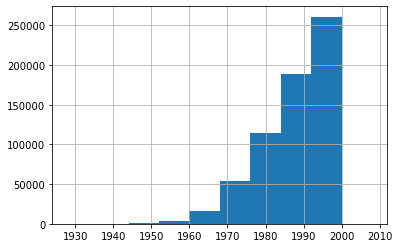

In [61]:
complete_set["birth_year"].hist()

Some variables are better interprerted as categories.

In [68]:
# Calculate correlations with target (default)
corr_matrix = complete_set_clean.corr()
corr_matrix["default"].sort_values(ascending=False, key=pd.Series.abs)

default                1.000000
n_sem_course          -0.225113
sem_funded            -0.191564
total_debt            -0.169234
loan_value            -0.166768
tuition_discounted    -0.150590
perc_requested         0.149988
tuition_current       -0.149169
student_resource      -0.144959
family_income         -0.144437
loan_limit            -0.139739
loan_value_sem        -0.112094
fam_size              -0.102813
igc                   -0.080053
cc                    -0.054764
cpc                   -0.050762
inc_prop               0.046437
n_completed_sem        0.042785
date_contract         -0.041436
personal_income       -0.015609
high_school_endyear    0.013586
income_pc             -0.007431
semester_enroll        0.006789
Name: default, dtype: float64

### 4 - Add atributes

Adds a columns for a dummy that defines if the main occupation is student. An another one to define if the delay in repayment is more than one year (365 days)

In [38]:
#Recode ocupacao
complete_set_clean=complete_set_clean.assign(student=1*(complete_set["occupation"]=="Estudante"))
complete_set_clean=complete_set_clean.assign(default=1*(complete_set["days_delay"]>=365))

### 5 - Cleaning Data 

In [39]:
#Here are the columns we want to drop NA's and not treat like using median, or something else
complete_set_clean = complete_set_clean.dropna(subset=["semester_enroll",
                                                       "gender",
                                                       "occupation",
                                                       "marital_status",
                                                       "ethnicity",
                                                       "public_hs",
                                                       "state_course",
                                                       "degree",
                                                       "igc","cpc","cc",
                                                       "contract_phase",
                                                       "birth_year",
                                                       "high_school_endyear"])

In [40]:
#Birth year has to be corrected in the excel file
complete_set_clean = complete_set_clean.astype({"semester_enroll":str,
                                                "igc":'int64',"cpc":'int64',"cc":'int64',
                                               "birth_year":str
                                               })

In [41]:
#Get only categorical
complete_set_cat = complete_set_clean.select_dtypes(include=["object"])

### 6 - Creating a training and a test set

In this section we will create the training and test set using the function *train_test_split* from Scikit-Learn. Two important considerations about our choice:

* Our dataset is a sample provided by the Brazilian Governent and will not be updated. Therefore, we chose not to be concerned about future splits with updated data;

* Our data includes 637,822 instances. We assume it is big enough and do not employ stratified sampling.

In [42]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(complete_set_clean, test_size=0.2, random_state=42)

In [43]:
fies = train_set.drop("default", axis=1) # drop labels for training set
fies_labels = train_set["default"].copy()

In [ ]:
sample_incomplete_rows = fies[fies.isnull().any(axis=1)].head()
sample_incomplete_rows

### 7 - Pipeline

Functions that will be used to tranform our dataset

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ("num_imputer", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

ord_pipeline = Pipeline([
        ("ord_imputer", SimpleImputer(strategy="most_frequent")),
        ("ord_encoder", OrdinalEncoder()),
    ])

In [47]:
ord_attribs = ['igc','cpc','cc','date_contract']

num_attribs = ['family_income',
               'personal_income',
               'high_school_endyear',
               'n_sem_course',
               'n_completed_sem',
               'sem_funded',
               'QT_MESES_FINANC_SEMESTRE_ATUAL',
               'fam_size',
               'income_pc',
               'tuition_discounted',
               'tuition_current',
               'inc_prop',
               'perc_requested',
               'loan_value_sem',
               'student_resource',
               'loan_value',
               'loan_limit',
              #'days_delay',
               'total_debt']    

cat_attribs = ['semester_enroll',
               'gender',
               'occupation', 
               'marital_status',
               'ethnicity', 'public_hs', 'state_course', 'degree', 'contract_phase',
               'birth_year'
              ]

In [48]:
# Full pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("ord", ord_pipeline,ord_attribs)
        ])

In [49]:
fies_prepared = full_pipeline.fit_transform(fies)

In [50]:
fies_prepared[:1]

<1x482 sparse matrix of type '<class 'numpy.float64'>'
	with 31 stored elements in Compressed Sparse Row format>

### 8 - Classifiers



In [51]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, random_state=42)
sgd_clf.fit(fies_prepared, fies_labels)
(cross_val_score(sgd_clf, fies_prepared, fies_labels, cv=3, scoring="roc_auc")).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.7215963069670138

In [52]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
logr.fit(fies_prepared, fies_labels)
(cross_val_score(logr, fies_prepared, fies_labels, cv=3, scoring="roc_auc")).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7527700284875865

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(fies_prepared, fies_labels)
(cross_val_score(rf, fies_prepared, fies_labels, cv=3, scoring="roc_auc")).mean()

0.797843514468243

In [54]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)
mlp.fit(fies_prepared, fies_labels.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [55]:
(cross_val_score(mlp, fies_prepared, fies_labels, cv=3, scoring="roc_auc")).mean()

0.8324472103276103